# Stochastic Models in Finance: TP3
## Options à barrières et lookback
By: 
- Adonis JAMAL
- Ayoub EL KBADI
- Fotios KAPOTOS

In [1]:
import numpy as np
from scipy.stats import norm
from matplotlib import pyplot as plt

In [2]:
# Model values
S0 = 100    # initial stock price
K = 100     # strike price
T = 1.0     # time to maturity in years
r = 0.05    # risk-free rate
sigma = 0.2 # volatility
d = 12      # number of observations
B = 140     # barrier level
L = 95      # down-and-in level
N = 10**4   # number of simulations

1. Prix Monte Carlo (avec intervalle de confiance) de l’option d’achat à barrière up-and-out de niveau B en fonction de S0.

In [3]:
def pricing_barrier_up_and_out(S0, K, T, r, sigma, B, d, N, barrier=True):
    dt = T / d
    Z = np.random.normal(0, 1, (N, d))

    # Paths
    drift = (r - 0.5 * sigma**2) * dt
    diffusion = sigma * np.sqrt(dt)

    log_returns = drift + diffusion * Z
    log_path = np.cumsum(log_returns, axis=1)
    S_path = S0 * np.exp(log_path)

    # Payoff
    S_T = S_path[:, -1]
    call_payoff = np.maximum(S_T - K, 0)

    # Barrier condition
    if barrier:
        max_price_per_path = np.max(S_path, axis=1)
        call_payoff = call_payoff * (max_price_per_path < B)

    discounted_payoff = np.exp(-r * T) * call_payoff

    # Price and 95% confidence interval
    price = np.mean(discounted_payoff)
    std_dev = np.std(discounted_payoff)
    confidence_interval = 1.96 * std_dev / np.sqrt(N)

    return price, confidence_interval

C:\Users\adoni\AppData\Local\Temp\ipykernel_31352\1081603854.py:44: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot(S0_range, results_standard['price'], 'k--', label='Standard Call (Vanilla)', color='black')


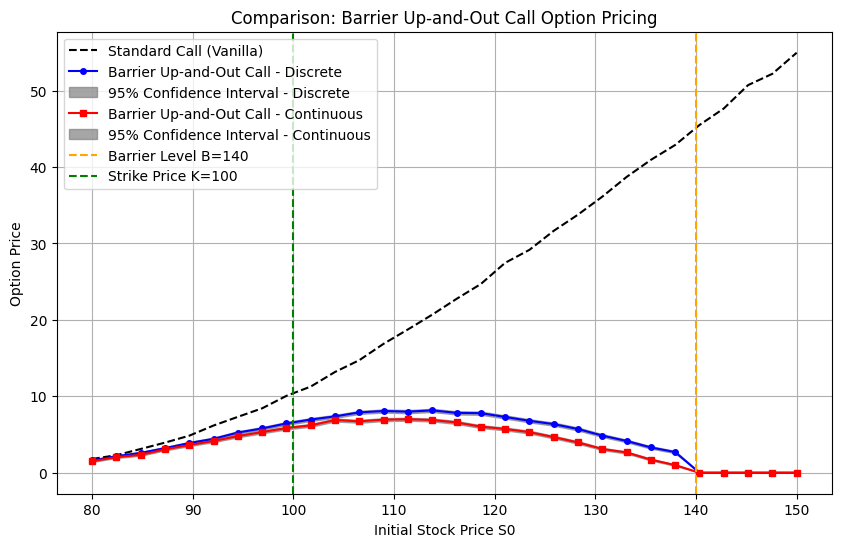

In [4]:
S0_range = np.linspace(80, 150, 30)

results_discrete = {'price': [], 'conf_int': []}
results_continuous = {'price': [], 'conf_int': []}
results_standard = {'price': [], 'conf_int': []}

for S in S0_range:
    if S >= B:
        results_discrete['price'].append(0)
        results_discrete['conf_int'].append(0)

        results_continuous['price'].append(0)
        results_continuous['conf_int'].append(0)

        # Standard call option price
        price, conf_int = pricing_barrier_up_and_out(S, K, T, r, sigma, B, d=1, N=N, barrier=False)
        results_standard['price'].append(price)
        results_standard['conf_int'].append(conf_int)
        continue

    # Discrete
    price_discrete, conf_int_discrete = pricing_barrier_up_and_out(S, K, T, r, sigma, B, d=12, N=N, barrier=True)
    results_discrete['price'].append(price_discrete)
    results_discrete['conf_int'].append(conf_int_discrete)

    # Continuous
    price_continuous, conf_int_continuous = pricing_barrier_up_and_out(S, K, T, r, sigma, B, d=252, N=N, barrier=True)
    results_continuous['price'].append(price_continuous)
    results_continuous['conf_int'].append(conf_int_continuous)

    # Standard
    price_standard, conf_int_standard = pricing_barrier_up_and_out(S, K, T, r, sigma, B, d=1, N=N, barrier=False)
    results_standard['price'].append(price_standard)
    results_standard['conf_int'].append(conf_int_standard)

for res in [results_discrete, results_continuous, results_standard]:
    res['price'] = np.array(res['price'])
    res['conf_int'] = np.array(res['conf_int'])

# Plot
plt.figure(figsize=(10, 6))

# Standard
plt.plot(S0_range, results_standard['price'], 'k--', label='Standard Call (Vanilla)', color='black')

# Discrete Barrier
plt.plot(S0_range, results_discrete['price'], 'b-o', markersize=4, label='Barrier Up-and-Out Call - Discrete')
plt.fill_between(S0_range, results_discrete['price'] - results_discrete['conf_int'], results_discrete['price'] + results_discrete['conf_int'], color='gray', alpha=0.7, label='95% Confidence Interval - Discrete')

# Continuous Barrier
plt.plot(S0_range, results_continuous['price'], 'r-s', markersize=4, label='Barrier Up-and-Out Call - Continuous')
plt.fill_between(S0_range, results_continuous['price'] - results_continuous['conf_int'], results_continuous['price'] + results_continuous['conf_int'], color='gray', alpha=0.7, label='95% Confidence Interval - Continuous')

plt.axvline(B, color='orange', linestyle='--', label=f'Barrier Level B={B}')
plt.axvline(K, color='green', linestyle='--', label=f'Strike Price K={K}')
plt.title('Comparison: Barrier Up-and-Out Call Option Pricing')
plt.xlabel('Initial Stock Price S0')
plt.ylabel('Option Price')
plt.legend()
plt.grid()
plt.show()

Le call standard représente une borne maximale pour le call à barrière up-and-out, et augmente avec $S_0$. Le prix de l'option à barrière sera toujours inférieur ou égal au prix du call standard, car l'option devient nulle si le prix de l'actif sous-jacent atteint la barrière B. Ainsi, lorsque $S_0$ approche de B, le prix de l'option à barrière diminue, car la probabilité que l'option soit désactivée augmente.

Quant à la comparaison avec la variante continue, on observe que les deux courbes obtenues se comportent de manière similaire (une augmentation avec $S_0$ et une diminution lorsque $S_0$ se rapproche de $B$, jusqu'à devenir nulle). Cependant, la variante continue est toujours légèrement inférieure à la variante discrète. Cela s'explique par le fait que dans la variante continue, l'option peut être désactivée à tout moment, tandis que dans la variante discrète, l'option n'est désactivée qu'à des points de temps spécifiques. Par conséquent, la probabilité de désactivation est plus élevée dans la variante continue, ce qui conduit à un prix légèrement inférieur pour l'option à barrière up-and-out.

Finalement, on remarque que quand on s'approche de la barrière B, la décroissance du prix de l'option à barrière devient plus abrupte, notamment pour la variante discrète. Cela est dû au fait que lorsque $S_0$ est proche de $B$, même une petite augmentation du prix de l'actif sous-jacent peut entraîner la désactivation de l'option, ce qui réduit considérablement sa valeur.

2. Prix Monte Carlo de l’option d’achat à barrière up-and-out (variante discrète) en fonction du nombre de dates d’observations.

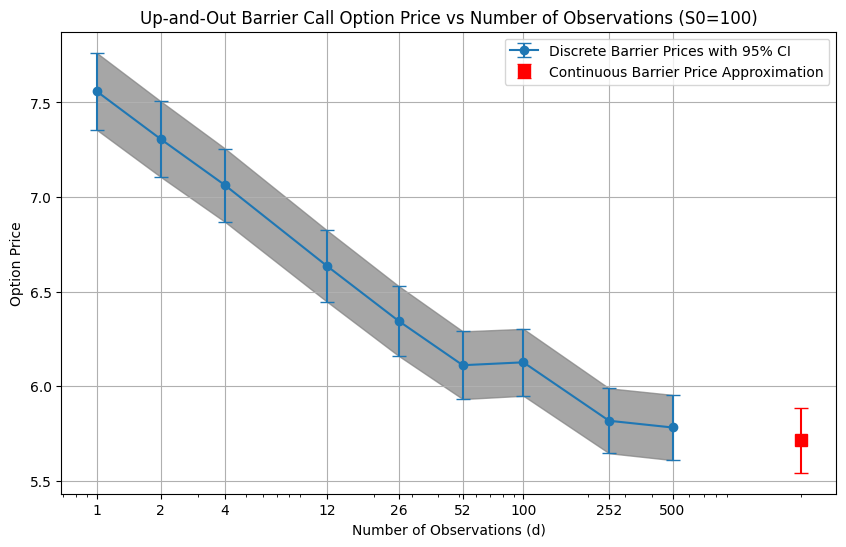

In [5]:
d_values = [1, 2, 4, 12, 26, 52, 100, 252, 500]

prices_d = []
cis_d = []

for d_obs in d_values:
    price, ci = pricing_barrier_up_and_out(S0, K, T, r, sigma, B, d=d_obs, N=N, barrier=True)
    prices_d.append(price)
    cis_d.append(ci)

prices_d = np.array(prices_d)
cis_d = np.array(cis_d)

# Use d=2000 as approximation for continuous
price_continuous, ci_continuous = pricing_barrier_up_and_out(S0, K, T, r, sigma, B, d=2000, N=N, barrier=True)

# Plot
plt.figure(figsize=(10, 6))

plt.errorbar(d_values, prices_d, yerr=cis_d, fmt='-o', capsize=5, label='Discrete Barrier Prices with 95% CI')
plt.fill_between(d_values, prices_d - cis_d, prices_d + cis_d, color='gray', alpha=0.7)

plt.errorbar([2000], [price_continuous], yerr=[ci_continuous], fmt='rs', capsize=5, label='Continuous Barrier Price Approximation', markersize=8)

plt.xscale('log')
plt.xticks(d_values, d_values)
plt.title(f"Up-and-Out Barrier Call Option Price vs Number of Observations (S0={S0})")
plt.xlabel('Number of Observations (d)')
plt.ylabel('Option Price')
plt.legend()
plt.grid(True)
plt.show()

On observe que plus le nombre d'observations $d$ augments, plus le prix de l'option à barrière up-and-out diminue. 

Cela s'explique par le fait qu'avec un plus grand nombre d'observations, il y a plus d'opportunités pour que le prix de l'actif sous-jacent atteigne ou dépasse la barrière B, ce qui entraîne la désactivation de l'option. 

Si on observe peu souvent, le prix de l'actif peut monter au-dessus de la barrière et redescendre avant la prochaine date d'observation sans que l'option soit désactivée. Ainsi, avec un nombre d'observations plus élevé, la probabilité que l'option soit désactivée augmente, ce qui réduit sa valeur.

Le prix discret de l'option converge asymptotiquement vers le prix de la variante continue lorsque le nombre d'observations devient très grand.

3. Call down-and-in de niveau L.

In [6]:
def pricing_barrier_down_and_in(S0, K, T, r, sigma, L, d, N, barrier=True):
    dt = T / d
    Z = np.random.normal(0, 1, (N, d))

    # Paths
    drift = (r - 0.5 * sigma**2) * dt
    diffusion = sigma * np.sqrt(dt)

    log_returns = drift + diffusion * Z
    log_path = np.cumsum(log_returns, axis=1)
    S_path = S0 * np.exp(log_path)

    # Payoff
    S_T = S_path[:, -1]
    call_payoff = np.maximum(S_T - K, 0)

    # Barrier condition
    if barrier:
        min_price_per_path = np.min(S_path, axis=1)
        call_payoff = call_payoff * (min_price_per_path <= L)

    discounted_payoff = np.exp(-r * T) * call_payoff

    # Price and 95% confidence interval
    price = np.mean(discounted_payoff)
    std_dev = np.std(discounted_payoff)
    confidence_interval = 1.96 * std_dev / np.sqrt(N)

    return price, confidence_interval

C:\Users\adoni\AppData\Local\Temp\ipykernel_31352\578032172.py:31: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot(S0_range, results_standard['price'], 'k--', label='Standard Call (Vanilla)', color='black')


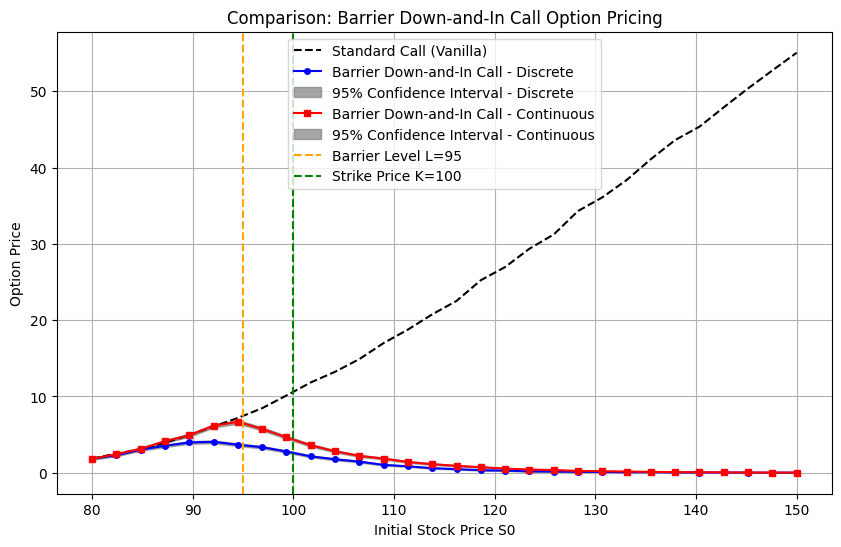

In [7]:
S0_range = np.linspace(80, 150, 30)

results_di_discrete = {'price': [], 'conf_int': []}
results_di_continuous = {'price': [], 'conf_int': []}
results_standard = {'price': [], 'conf_int': []}

for S in S0_range:
    # Standard Call
    price_standard, conf_int_standard = pricing_barrier_down_and_in(S, K, T, r, sigma, L, d=1, N=N, barrier=False)
    results_standard['price'].append(price_standard)
    results_standard['conf_int'].append(conf_int_standard)

    # Down-and-In Discrete
    price_di_discrete, conf_int_di_discrete = pricing_barrier_down_and_in(S, K, T, r, sigma, L, d=12, N=N, barrier=True)
    results_di_discrete['price'].append(price_di_discrete)
    results_di_discrete['conf_int'].append(conf_int_di_discrete)

    # Down-and-In Continuous
    price_di_continuous, conf_int_di_continuous = pricing_barrier_down_and_in(S, K, T, r, sigma, L, d=252, N=N, barrier=True)
    results_di_continuous['price'].append(price_di_continuous)
    results_di_continuous['conf_int'].append(conf_int_di_continuous)

for res in [results_di_discrete, results_di_continuous, results_standard]:
    res['price'] = np.array(res['price'])
    res['conf_int'] = np.array(res['conf_int'])

# Plot
plt.figure(figsize=(10, 6))

# Standard
plt.plot(S0_range, results_standard['price'], 'k--', label='Standard Call (Vanilla)', color='black')

# Down-and-In Discrete
plt.plot(S0_range, results_di_discrete['price'], 'b-o', markersize=4, label='Barrier Down-and-In Call - Discrete')
plt.fill_between(S0_range, results_di_discrete['price'] - results_di_discrete['conf_int'], results_di_discrete['price'] + results_di_discrete['conf_int'], color='gray', alpha=0.7, label='95% Confidence Interval - Discrete')

# Down-and-In Continuous
plt.plot(S0_range, results_di_continuous['price'], 'r-s', markersize=4, label='Barrier Down-and-In Call - Continuous')
plt.fill_between(S0_range, results_di_continuous['price'] - results_di_continuous['conf_int'], results_di_continuous['price'] + results_di_continuous['conf_int'], color='gray', alpha=0.7, label='95% Confidence Interval - Continuous')

plt.axvline(L, color='orange', linestyle='--', label=f'Barrier Level L={L}')
plt.axvline(K, color='green', linestyle='--', label=f'Strike Price K={K}')

plt.title('Comparison: Barrier Down-and-In Call Option Pricing')
plt.xlabel('Initial Stock Price S0')
plt.ylabel('Option Price')
plt.legend()
plt.grid(True)
plt.show()

Quand $S_0$ est inférieur à $L$, le prix de l'option down-and-in est proche de celui du call standard, car l'option est activée dès le départ. Le prix de la variante continue se superpose parfaitement à celui d'un call standard dans cette région, tandis que la variante discrète est légèrement inférieure en raison de la possibilité que l'option ne soit pas activée si le prix ne descend pas en dessous de L lors des observations discrètes.

Lorsque $S_0$ est supérieur à $L$, le prix de l'option down-and-in diminue, et devient inférieur au prix du call standard. L'option n'est activée que si le prix de l'actif sous-jacent descend en dessous de L à un moment donné. Plus $S_0$ est élevé par rapport à L, moins il est probable que l'option soit activée (redescendre en dessous de L puis remonter au-dessus du strike price), ce qui réduit sa valeur.

Par ailleurs, inversement à l'option up-and-out, le prix de la variante discrète est toujours inférieur à celui de la variante continue. En effet, pour être payé, l'option doit être activée, et la probabilité d'activation est plus faible dans la variante discrète car l'option ne peut être activée qu'à des points de temps spécifiques. Ainsi, la variante continue, qui permet une activation à tout moment, a une probabilité plus élevée d'être activée, ce qui conduit à un prix plus élevé pour l'option down-and-in.

4. Monte Carlo conditionnel pour le pricing du call down-and-in.

In [8]:
def black_scholes_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T) + 1e-10)
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

def pricing_variance_reduction(S0, K, T, r, sigma, L, d, N):
    dt = T / d

    Z = np.random.normal(0, 1, (N, d))

    drift = (r - 0.5 * sigma**2) * dt
    diffusion = sigma * np.sqrt(dt)
    log_returns = drift + diffusion * Z
    log_path = np.cumsum(log_returns, axis=1)
    S_path = S0 * np.exp(log_path)

    # Standard Down-and-In Call Payoff
    S_T = S_path[:, -1]
    min_price = np.min(S_path, axis=1)
    payoff_std = np.exp(-r * T) * np.maximum(S_T - K, 0) * (min_price <= L)
    
    price_std = np.mean(payoff_std)
    var_std = np.var(payoff_std)

    # Conditional Monte Carlo
    below_barrier = (S_path <= L)
    has_crossed = np.any(below_barrier, axis=1)

    first_crossing_indices = np.argmax(below_barrier, axis=1)

    payoffs_cond = np.zeros(N)

    indices_crossed = np.where(has_crossed)[0]

    if len(indices_crossed) > 0:
        crossing_times = (first_crossing_indices[indices_crossed] + 1) * dt
        S_at_crossing = S_path[indices_crossed, first_crossing_indices[indices_crossed]]
        remaining_T = T - crossing_times

        bs_values = black_scholes_call(S_at_crossing, K, remaining_T, r, sigma)
        payoffs_cond[indices_crossed] = np.exp(-r * crossing_times) * bs_values

    price_cond = np.mean(payoffs_cond)
    var_cond = np.var(payoffs_cond)

    # Antithetic Variates
    # Trajectory 1: Z
    payoff_1 = payoff_std

    # Trajectory 2: -Z
    log_returns_antithetic = drift + diffusion * (-Z)
    log_path_antithetic = np.cumsum(log_returns_antithetic, axis=1)
    S_path_antithetic = S0 * np.exp(log_path_antithetic)

    min_price_antithetic = np.min(S_path_antithetic, axis=1)
    S_T_antithetic = S_path_antithetic[:, -1]
    payoff_2 = np.exp(-r * T) * np.maximum(S_T_antithetic - K, 0) * (min_price_antithetic <= L)

    payoff_antithetic = 0.5 * (payoff_1 + payoff_2)
    price_antithetic = np.mean(payoff_antithetic)
    var_antithetic = np.var(payoff_antithetic)

    # Comparison
    correlation = np.corrcoef(payoff_1, payoff_2)[0, 1]
    theoretical_reduction_factor = 2 / (1 + correlation)

    return {
        "prices": [price_std, price_cond, price_antithetic],
        "variances": [var_std, var_cond, var_antithetic],
        "factors": [var_std / var_cond, var_std / var_antithetic],
        "rho": correlation,
        "theoretical_reduction_factor": theoretical_reduction_factor
    }

In [9]:
results = pricing_variance_reduction(S0, K, T, r, sigma, L, d=12, N=N)

print(f"Results for S0={S0}, L={L}, d={12}, N={N}:")
print(f"Standard Price      : {results['prices'][0]:.4f}")
print(f"Conditional Price   : {results['prices'][1]:.4f}")
print(f"Antithetic Price    : {results['prices'][2]:.4f}")
print("-"*20)
print(f"Standard Variance   : {results['variances'][0]:.4f}")
print(f"Conditional Variance: {results['variances'][1]:.4f}")
print(f"Antithetic Variance : {results['variances'][2]:.4f}")
print("-"*20)
print(f"Conditional Reduction Factor    : {results['factors'][0]:.4f}")
print(f"Antithetic Reduction Factor     : {results['factors'][1]:.4f}")
print(f"Theoretical Antithetic Factor   : {results['theoretical_reduction_factor']:.4f} (rho={results['rho']:.4f})")

Results for S0=100, L=95, d=12, N=10000:
Standard Price      : 2.6237
Conditional Price   : 2.6060
Antithetic Price    : 2.6234
--------------------
Standard Variance   : 52.6908
Conditional Variance: 6.0574
Antithetic Variance : 23.2006
--------------------
Conditional Reduction Factor    : 8.6985
Antithetic Reduction Factor     : 2.2711
Theoretical Antithetic Factor   : 2.2893 (rho=-0.1264)


Pour le Monte Carlo conditionnel, on observe un factor de réduction d'environ 7.7 par rapport à la méthode de Monte Carlo standard.

Dans la méthode standard, la variance provient de l'incertitude de franchir la barrière et de l'invertitude de la diffusion de l'actif après le franchissement. Le Monte Carlo conditionnel élimine l'incertitude de la diffusion après le franchissement en utilisant la formule de Black-Scholes, ce qui réduit considérablement la variance de l'estimateur. Pour une option in où $S_0$ est proche de $L$, cela s'avère efficace.

Pour la méthode de réduction par variables antithétiques, on observe un factor de réduction d'environ 2.2 par rapport à la méthode de Monte Carlo standard. Cette réduction est moins importante que celle obtenue avec le Monte Carlo conditionnel puisque la méthode repose sur la linéarité locale du payoff. Si $Z$ touche la barrière, $-Z$ est moins susceptible de le faire, ce qui fait que la corrélation entre les deux estimateurs n'est pas parfaitement égale à -1, limitant ainsi l'efficacité de la méthode.

Toutefois, le facteur de réduction obtenu est très proche du facteur théorique attendu ($\approx 2.3$).

Pour le produit down-and-in en question, l'approche par Monte Carlo conditionnel est plus efficace que l'approche par variables antithétiques en termes de réduction de la variance et exploite mieux la structure du problème.

5. (Pour aller plus loin) réductions de variance en fonction de la barrière L.

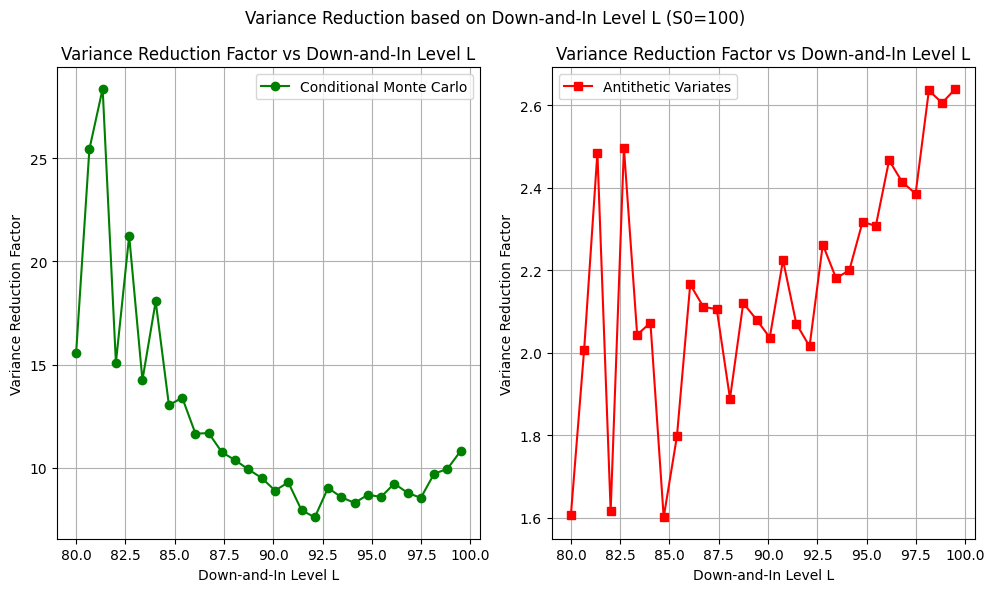

Average Conditional Factor: 12.0758
Average Antithetic Factor: 2.1655


In [10]:
# On fait varier la barrière L, en restant en dessous de S0=100
L_values = np.linspace(80, 99.5, 30)

vrf_conditional = []
vrf_antithetic = []

for val_L in L_values:
    results = pricing_variance_reduction(S0, K, T, r, sigma, val_L, d=12, N=N)
    vrf_conditional.append(results['factors'][0])
    vrf_antithetic.append(results['factors'][1])

vrf_conditional = np.array(vrf_conditional)
vrf_antithetic = np.array(vrf_antithetic)

# Plot
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.plot(L_values, vrf_conditional, 'g-o', label='Conditional Monte Carlo')
plt.title('Variance Reduction Factor vs Down-and-In Level L')
plt.xlabel('Down-and-In Level L')
plt.ylabel('Variance Reduction Factor')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(L_values, vrf_antithetic, 'r-s', label='Antithetic Variates')
plt.title('Variance Reduction Factor vs Down-and-In Level L')
plt.xlabel('Down-and-In Level L')
plt.ylabel('Variance Reduction Factor')
plt.grid(True)
plt.legend()

plt.suptitle(f"Variance Reduction based on Down-and-In Level L (S0={S0})")
plt.tight_layout()
plt.show()

print(f"Average Conditional Factor: {np.mean(vrf_conditional):.4f}")
print(f"Average Antithetic Factor: {np.mean(vrf_antithetic):.4f}")

Pour le Monte Carlo conditionnel, le facteur de réduction est généralement très élevé (plus de 15 quand $L$ est loin de $S_0$, et en moyenne autour de 12.1), et tend à diminuer et se stabiliser plus $L$ se rapproche de $S_0$.

En effet, lorsque $L$ est loin de $S_0$, la probabilité que l'option soit activée est faible, la plupart des trajectoires ne franchissent pas la barrière et ont un payoff nul. Dans ce cas, le Monte Carlo conditionnel est très efficace car il utilise la formule de Black-Scholes pour estimer le payoff conditionnellement au franchissement de la barrière, réduisant ainsi considérablement la variance.

Les variables antithétiques offrent un facteur de réduction moins important (en moyenne autour de 2.2), et augmente légérement plus $L$ se rapproche de $S_0$. On note quand même que le facteur de réduction reste toujours supérieur à 1, indiquant que la méthode est efficace pour toutes les valeurs de $L$, bien que des chutes de performance soient observées.

La barrière introduit une discontinuité dans le payoff, ce qui limite l'efficacité des variables antithétiques, qui reposent sur la linéarité locale du payoff pour réduire la variance. Une trajectoire $Z$ peut toucher la barrière alors que sa trajectoire antithétique $-Z$ ne le fait pas, ce qui réduit la corrélation négative entre les deux estimateurs et limite la réduction de variance obtenue.

Ainsi, pour les options à barrière et plus généralement pour les options exotiques dépendant du chemin, les méthodes qui exploitent la structure du produit comme le Monte Carlo conditionnel sont plus efficaces que les méthodes générales comme les variables antithétiques.